# Income Classification

In [1]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kstest
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline

## 1. Exploratory Data Analysis

Load the data from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data to a variable `df` as a `pandas.DataFrame`. The columns are defined as follows:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K.

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marrital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                header = None,
                names = col_names)

#### Change all '?' with `NaN`

In [3]:
df.replace('\?', np.nan, regex = True, inplace = True)

#### Check how man missing values per column

In [4]:
df.isnull().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education_num         0
marrital_status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64

#### Plot Distribution for 'Hours per Week' Variable

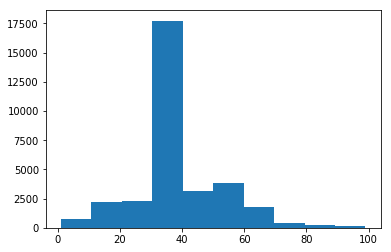

In [5]:
plt.figure()
plt.hist(df['hours_per_week'])
plt.show()

#### Plot the `age` distribution conditioned on the `race` variable.

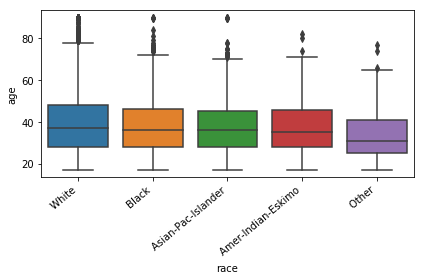

In [6]:
ax = sns.boxplot(x = 'race', y = 'age', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density Probability')

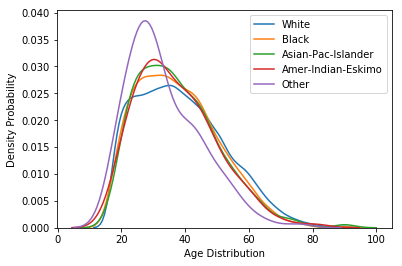

In [7]:
sns.kdeplot(df[df['race'] == ' White']['age'], Label = 'White')
sns.kdeplot(df[df['race'] == ' Black']['age'], Label = 'Black')
sns.kdeplot(df[df['race'] == ' Asian-Pac-Islander']['age'], Label = 'Asian-Pac-Islander')
sns.kdeplot(df[df['race'] == ' Amer-Indian-Eskimo']['age'], Label = 'Amer-Indian-Eskimo')
sns.kdeplot(df[df['race'] == ' Other']['age'], Label = 'Other')

plt.xlabel('Age Distribution')
plt.ylabel('Density Probability')

#### We will explore country with most Doctor Educatation

In [8]:
df[df['education'] == ' Doctorate']['native_country'].value_counts()

 United-States    328
 China              9
 Taiwan             8
 Canada             8
 Germany            6
 India              5
 Iran               5
 England            4
 France             3
 Hong               2
 Cuba               2
 Mexico             1
 Vietnam            1
 El-Salvador        1
 Jamaica            1
 Italy              1
 Thailand           1
 Columbia           1
 Japan              1
 Poland             1
 South              1
Name: native_country, dtype: int64

#### We will explore top three combinations of `workclass` and `education`.

In [9]:
df.groupby(['workclass', 'education']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:3]

,workclass,education,Count
0,Private,HS-grad,7780
1,Private,Some-college,5094
2,Private,Bachelors,3551


##### It can be seen that top three combinations of workclass and education are (Private, HS-grad), (Private, Some-college), and (Private- Bachelors)

#### We will explore the correlation of the number of master's and weekly working hours for each country. 

In [10]:
# First We need to create a new table whose the column are Country Number of Masters, and the average of working hours
# per week for each country
dummy_data_1 = df[df['education'] == ' Masters']['native_country'].value_counts()
dummy_data_1 = dummy_data_1.to_frame()
dummy_data_1.columns = ['Number of Masters']
dummy_data_1['native_country'] = dummy_data_1.index
dummy_data_1 = dummy_data_1.reset_index(drop = True)
dummy_data_1 = dummy_data_1[['native_country', 'Number of Masters']]

dummy_data_2 = df.groupby('native_country').agg({'hours_per_week' : 'mean'})
dummy_data_2['native_country'] = dummy_data_2.index
dummy_data_2 = dummy_data_2.reset_index(drop = True)
dummy_data_2 = dummy_data_2[['native_country', 'hours_per_week']]

dummy_data = dummy_data_2.merge(dummy_data_1, how = 'left', on = 'native_country')
dummy_data.fillna(0, inplace = True)

dummy_data

,native_country,hours_per_week,Number of Masters
0,Cambodia,40.894737,0.0
1,Canada,40.404959,8.0
2,China,37.786667,11.0
3,Columbia,39.067797,1.0
4,Cuba,39.157895,5.0
5,Dominican-Republic,42.471429,2.0
6,Ecuador,39.571429,2.0
7,El-Salvador,36.792453,3.0
8,England,41.833333,9.0
9,France,45.068966,5.0


                   hours_per_week  Number of Masters
hours_per_week           1.000000           0.241758
Number of Masters        0.241758           1.000000


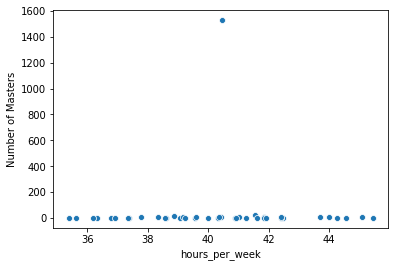

In [11]:
# Use Spearman Correlation
sns.scatterplot(x = 'hours_per_week', y = 'Number of Masters', data = dummy_data)
print(dummy_data.corr(method = 'spearman'))

##### Coefficient Correlation value between number of master's and weekly working hours for each country is just 0.24. There is not much correlation between number of masters and weekly working hours for each country, or in other words number of working hours doesn't really correlate with number of master's for each country.

In [12]:
df['income_dummy'] = df['income']

df['income_dummy'][df['income_dummy'] == ' <=50K'] = 0
df['income_dummy'][df['income_dummy'] == ' >50K'] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
df.fillna('Missing_Value', inplace = True)

In [14]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_dummy
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_dummy,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


Here can be seen that fnlwgt almost doesn't have any effect to income.

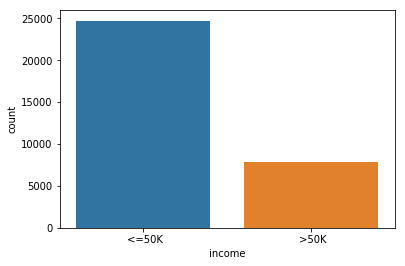

In [15]:
sns.countplot(x = 'income', data = df)

In [16]:
len(df[df['income'] == ' <=50K'])/len(df)

0.7591904425539756

##### 75% of people have income <=50K. This imbalance class information is important to determine the right metrics to measure the model quality.

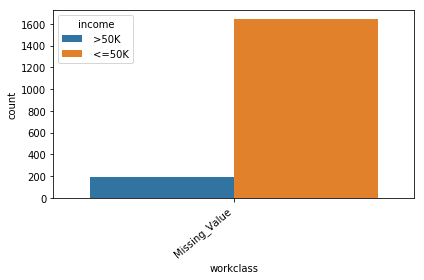

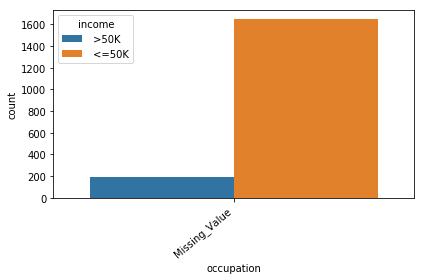

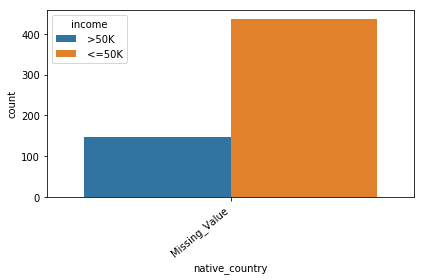

In [17]:
ax = sns.countplot(x = 'workclass', hue = 'income', data = df[df['workclass'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

ax = sns.countplot(x = 'occupation', hue = 'income', data = df[df['occupation'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


ax = sns.countplot(x = 'native_country', hue = 'income', data = df[df['native_country'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Above can be seen that Missing Values from workclass, occupation, and native country can differentiate income relatively well. So it could take into consideration to not remove these missing values.

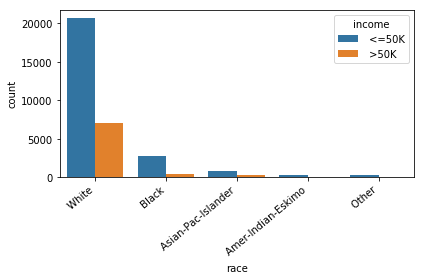

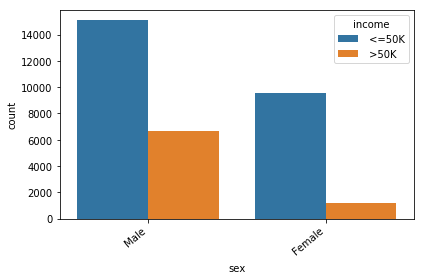

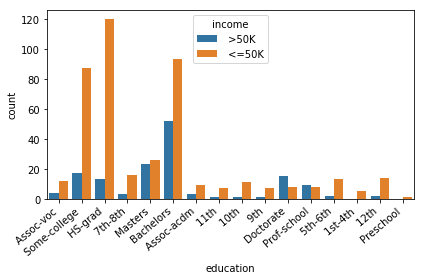

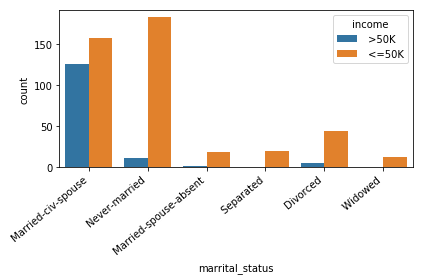

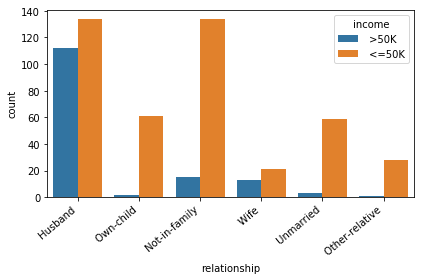

In [18]:
ax = sns.countplot(x = 'race', hue = 'income', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

ax = sns.countplot(x = 'sex', hue = 'income', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


ax = sns.countplot(x = 'education', hue = 'income', data = df[df['native_country'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


ax = sns.countplot(x = 'marrital_status', hue = 'income', data = df[df['native_country'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


ax = sns.countplot(x = 'relationship', hue = 'income', data = df[df['native_country'] == 'Missing_Value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## 2. Create a Model

##### We will use XGBoost to create our model. We will also show the improvement to our model after doing hyperparameter tuning. 

In [48]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from xgboost import XGBClassifier

##### Considering the model have imbalance target class, which most of target in positive class (<=50K),it will be easier to get higher accuracy. So we also have to look at Specificity to measured the quality of the model.

In [20]:
# Columns to be encode using one hot encoder
# Doesn't include education_num because it is ordinal categorical variable
columns_to_encode = ['workclass', 'marrital_status', 'occupation', 'relationship', 'sex', 'native_country']

In [21]:
# Drop education column because we already have education_num column which represent the same thing
# Drop fnlwgt because there is almost no correlation between fnlwgt and income
# Drop race because from the graph aboce it can be seen that race doesn't really differentiate income well
# Drop income_dummy because we don't need it
df.drop(['education', 'fnlwgt', 'race', 'income_dummy'], axis = 1, inplace = True)

In [22]:
df = pd.get_dummies(df, columns = columns_to_encode, drop_first = True)

In [23]:
sc = StandardScaler()
sc.fit(df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']] = sc.transform(df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
X = df.loc[:, df.columns != 'income']
y = df.loc[:, df.columns == 'income']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 7, shuffle = True, stratify = y)

In [36]:
# Without Hyperparameter Tuning
model =XGBClassifier(random_state = 11)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_predict = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8628087570745404


In [41]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[16498   806]
 [ 2321  3168]]
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     17304
        >50K       0.80      0.58      0.67      5489

   micro avg       0.86      0.86      0.86     22793
   macro avg       0.84      0.77      0.79     22793
weighted avg       0.86      0.86      0.85     22793



In [30]:
# With Hyperparameter Tuning
model = XGBClassifier(random_state = 11)
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
model_cv = RandomizedSearchCV(model, param_distributions = params, cv = 5, random_state = 0)

model_cv.fit(X, y)
model_cv.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [32]:
model_cv.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 9.24806128,  9.06312118, 11.22055626,  7.41239271,  5.53138309,
        10.56521554,  5.98071041,  8.60941429,  7.44081087, 13.45055208]),
 'std_fit_time': array([0.05119646, 0.0515396 , 0.02505724, 0.02759706, 0.0350435 ,
        0.05487527, 0.02064348, 0.08706584, 0.03319525, 0.03208747]),
 'mean_score_time': array([0.06251702, 0.06050324, 0.0845788 , 0.04789171, 0.05148149,
        0.08634501, 0.04958158, 0.05122814, 0.05887098, 0.06917243]),
 'std_score_time': array([0.00117793, 0.00061689, 0.00110702, 0.0003118 , 0.0081854 ,
        0.00087886, 0.00099543, 0.00050501, 0.00173605, 0.00033598]),
 'param_min_child_weight': masked_array(data=[1, 7, 3, 1, 7, 7, 7, 7, 3, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 6, 10, 3, 3, 12, 3, 4, 5, 8],
              mask=[False, False, False, False, False, F

In [43]:
model_cv.best_score_

0.8732839900494457

In [44]:
final_model = model_cv.best_estimator_
print(final_model.score(X_test, y_test))
y_predict = final_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.8816303250998113
[[16399   905]
 [ 1793  3696]]
              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92     17304
        >50K       0.80      0.67      0.73      5489

   micro avg       0.88      0.88      0.88     22793
   macro avg       0.85      0.81      0.83     22793
weighted avg       0.88      0.88      0.88     22793



In [46]:
fpr = 1793/(1793+3696)
specificity = 1 - fpr
print(specificity)

0.6733466933867736


##### We can see that hyperparamter tuning improve all of the metrics. Overall, the accuracy is very good (88%), but because of the imbalance class target, we should also consider another metrics like False Positive Rate and Specificity, to measure our model quality in the small class target. And for this metrics, our specificity is 67%. 
#### So we should do more feature engineering to improve our model.